In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import pandas as pd
import numpy as np
#import statsmodels.api as sm
#import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
#import matplotlib.mlab as mlabb
%matplotlib inline

In [3]:
heart_df = pd.read_csv('C:\\Users\\Admin\\Documents\\1st_semester\\Projects\\Python\\framingham.csv')

In [4]:
heart_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
heart_df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
count=0
for i in heart_df.isnull().sum(axis=1):
    if i>0:
        count=count+1
print("total number of rows with missing values is", count)
print("it is", round((count/len(heart_df.index))*100),'percent of the entire dataset the rows with missing values are imputed')


total number of rows with missing values is 582
it is 14 percent of the entire dataset the rows with missing values are imputed


In [7]:
#The data missing is 14% of the total data which is high and we need to impute the values

In [8]:
heart_df['cigsPerDay'].isnull().sum()

29

In [9]:
#there are 29 records with 'cogsPerDay' and we will replace them with mean value
import math
mean_value=heart_df['cigsPerDay'].mean()
mean_value = math.floor(mean_value)
heart_df['cigsPerDay']=heart_df['cigsPerDay'].isnull().sum()

In [10]:
#Null values have been replaced by mean value
heart_df['cigsPerDay'].isnull().sum()

0

In [11]:
#Find the education counts of different types
heart_df['education'].value_counts()


1.0    1720
2.0    1253
3.0     689
4.0     473
Name: education, dtype: int64

In [12]:
#The education 1.0 is maximum numbers and we can replace null values for education with mode value
heart_df['education'].fillna(heart_df['education'].mode()[0],inplace=True)

In [13]:
heart_df['education'].value_counts()

1.0    1825
2.0    1253
3.0     689
4.0     473
Name: education, dtype: int64

In [14]:
#Fill the null values in glucose column with mean value
mean_value = heart_df['glucose'].mean()
heart_df['glucose'] = heart_df['glucose'].fillna(mean_value)

In [15]:
heart_df.isnull().sum()

male                0
age                 0
education           0
currentSmoker       0
cigsPerDay          0
BPMeds             53
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol            50
sysBP               0
diaBP               0
BMI                19
heartRate           1
glucose             0
TenYearCHD          0
dtype: int64

In [16]:
#Fill the BPMeds column which has null values with mode
heart_df['BPMeds'].fillna(heart_df['BPMeds'].mode()[0],inplace=True)

In [17]:
#Fill the heartRate column which has null values with mode
heart_df['heartRate'].fillna(heart_df['heartRate'].mode()[0],inplace=True)

In [18]:
heart_df.isnull().sum()

male                0
age                 0
education           0
currentSmoker       0
cigsPerDay          0
BPMeds              0
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol            50
sysBP               0
diaBP               0
BMI                19
heartRate           0
glucose             0
TenYearCHD          0
dtype: int64

In [19]:
#Fill the BMI column which has null values with median
heart_df['BMI'] = heart_df.fillna(heart_df['BMI'].median())

In [20]:
#Fill the totchol column which has null values with mean
mean_value = heart_df['totChol'].mean()
heart_df['totChol'] = heart_df['totChol'].fillna(mean_value)

In [21]:
heart_df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [22]:
#imputation completed as we have no columns with null values in the data or records

In [23]:
heart_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,29,0.0,0,0,0,195.0,106.0,70.0,1.0,80.0,77.0,0
1,0,46,2.0,0,29,0.0,0,0,0,250.0,121.0,81.0,0.0,95.0,76.0,0
2,1,48,1.0,1,29,0.0,0,0,0,245.0,127.5,80.0,1.0,75.0,70.0,0
3,0,61,3.0,1,29,0.0,0,1,0,225.0,150.0,95.0,0.0,65.0,103.0,1
4,0,46,3.0,1,29,0.0,0,0,0,285.0,130.0,84.0,0.0,85.0,85.0,0


In [24]:
def draw_histograms(dataframe,features,rows,cols):
    fig=plt.figure(figsize=(20,20))
    for i,feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color="DarkRed")
        
    fig.tight_layout()
    plt.show()

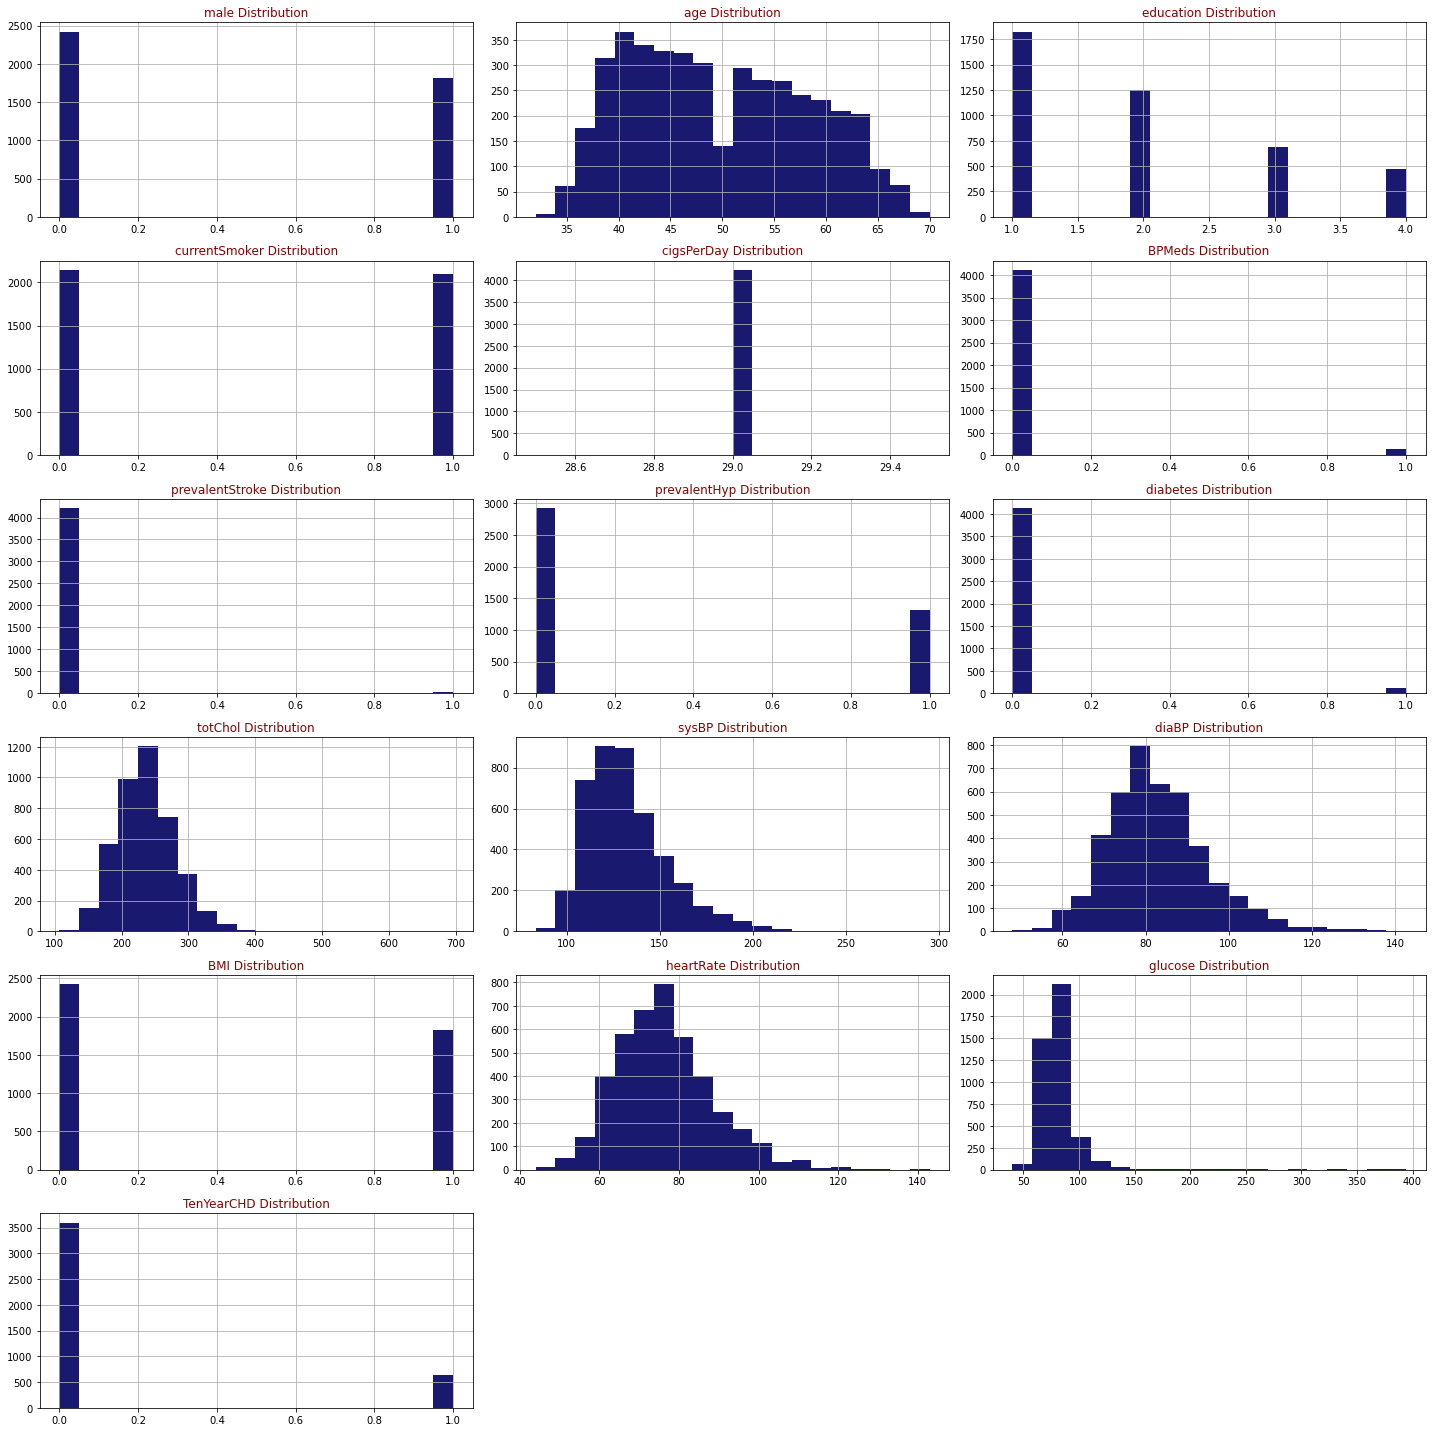

In [25]:
draw_histograms(heart_df,heart_df.columns,6,3)

In [26]:
heart_df.TenYearCHD.value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

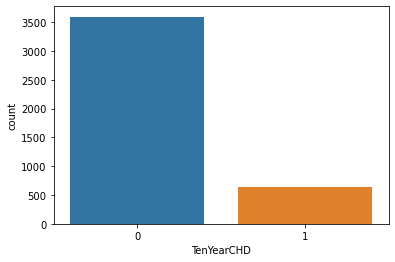

In [27]:
sn.countplot(x='TenYearCHD',data=heart_df)

In [28]:
heart_df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.0,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.955189,0.494104,29.0,0.029245,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,0.429245,75.878774,81.963655,0.151887
std,0.495027,8.572942,1.018522,0.500024,0.0,0.168513,0.076569,0.462799,0.158280,44.327521,22.033300,11.910394,0.495027,12.023937,22.831748,0.358953
min,0.000000,32.000000,1.000000,0.000000,29.0,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,0.000000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,29.0,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,0.000000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,29.0,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,0.000000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,29.0,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,1.000000,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,29.0,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,1.000000,143.000000,394.000000,1.000000


In [29]:
import sklearn
new_features = heart_df[['age','male','cigsPerDay','totChol','sysBP','glucose','TenYearCHD']]
x=new_features.iloc[:,:-1]
y=new_features.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=5)

In [30]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

In [31]:
sklearn.metrics.accuracy_score(y_test,y_pred)

0.8502358490566038

<AxesSubplot:>

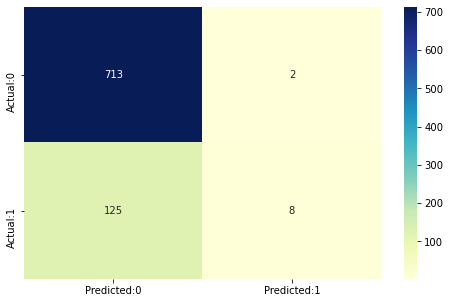

In [32]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])
plt.figure(figsize=(8,5))
sn.heatmap(conf_matrix,annot=True,fmt='d',cmap="YlGnBu")


In [33]:
TP=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TN=cm[1,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [34]:
print('the accuracy of the model = TP+TN/(TP+TN+FP+FN)= ',(TP+TN)/float(TP+TN+FP+FN),'\n',
      'the missclassification = 1-accuracy =',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',
      'sensitivity or True Positive rate = TP/(TP+FN)=',TP/float(TP+FN),'\n',
      'specificity or True Negative rate = TN/(TN+FP)=',TN/float(TN+FP),'\n',
      'positive predictive value = TP/(TP+FP)=', TP/float(TP+FP), '\n'
      'negative predictive value = TN/(TN+FP)=', TN/float(TN+FN), '\n'
      'Positive likelihood Ratio=sensitivity/(1-specificity)=',sensitivity/(1-specificity),'\n'
      'negative likelihood Ratio=(1-sensitivity)/(specificity)=',(1-sensitivity)/(specificity),'\n')

the accuracy of the model = TP+TN/(TP+TN+FP+FN)=  0.8502358490566038 
 the missclassification = 1-accuracy = 0.14976415094339623 
 sensitivity or True Positive rate = TP/(TP+FN)= 0.850835322195704 
 specificity or True Negative rate = TN/(TN+FP)= 0.8 
 positive predictive value = TP/(TP+FP)= 0.9972027972027973 
negative predictive value = TN/(TN+FP)= 0.06015037593984962 
Positive likelihood Ratio=sensitivity/(1-specificity)= 4.254176610978521 
negative likelihood Ratio=(1-sensitivity)/(specificity)= 0.18645584725536998 



In [35]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_test))
print('-------------------')
print(classification_report(y_test,y_pred))

[[715   0]
 [  0 133]]
-------------------
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       715
           1       0.80      0.06      0.11       133

    accuracy                           0.85       848
   macro avg       0.83      0.53      0.52       848
weighted avg       0.84      0.85      0.79       848

